#                             Covid-19 Sentiment Analysis

Our sds project is about checking how the number covid cases and deaths have affected the mean sentiment of tweets from 20-03-2020 to 9-10-2020.
The data sets we chose for the project are:
    
**tweets data**
https://ieee-dataport.org/open-access/coronavirus-covid-19-tweets-dataset#files
These consisted of the tweet id and sentiment of each tweet posted each day having hastags related to covid-19.

**covid statistics data**
We considered the WHO data-set containg the number of cases, cumulative number of cases, number of deaths and cumulative number of deaths for each day in our chosen time period. 


In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
%matplotlib inline

In [175]:
x2.describe()

,Mean Sentiment,Most Retweeted Sentiment,Most Liked Sentiment,Most Agreed With Sentiment,Number Of tweets,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,206.000000,206.000000,206.000000,206.000000,2.060000e+02,206.000000,2.060000e+02,206.000000,2.060000e+02
mean,0.027057,0.029239,0.075736,0.052488,3.034203e+06,175933.441748,1.320641e+07,5095.451456,5.117520e+05
std,0.098845,0.196689,0.062307,0.102679,1.022774e+06,91450.600544,1.082679e+07,1471.989911,3.068080e+05
min,-0.391890,-0.787500,-0.099444,-0.323775,2.882770e+05,24200.000000,2.525480e+05,1393.000000,1.131500e+04
25%,-0.012129,-0.048272,0.040854,0.012167,2.360150e+06,86048.250000,3.790510e+06,4213.500000,2.670368e+05
50%,0.027057,0.019744,0.075736,0.052488,3.411154e+06,176602.000000,9.915341e+06,5063.000000,4.948785e+05
75%,0.072552,0.108049,0.111223,0.100167,3.772698e+06,258615.000000,2.194456e+07,5937.750000,7.750092e+05
max,0.366677,0.750000,0.254388,0.440614,4.365170e+06,360711.000000,3.640469e+07,12434.000000,1.056799e+06


## Initial Dataset

In [3]:
tweets_data_example=pd.read_csv('corona_tweets_1.csv',header=None)
tweets_data_example.head()

,0,1
0,1240727808080412673,0.357143
1,1240727808005079041,0.116071
2,1240727808340414464,-0.050000
3,1240727808629813248,-0.714286
4,1240727808617230336,0.700000


In [4]:
who_data=pd.read_csv('WHO-COVID-19-global-data.csv')
who_data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


## Data cleaning

**Covid Data Cleaning**

In [ ]:
# cleaning of covid related data

d=df=pd.read_csv("WHO-COVID-19-global-data.csv")
df1=df[' New_cases'].groupby(df['Date_reported']).sum()
f=df[' Cumulative_cases'].groupby(df['Date_reported']).sum()
df2=df[' New_deaths'].groupby(df['Date_reported']).sum()
df3=df[' Cumulative_deaths'].groupby(df['Date_reported']).sum()
df1 = pd.merge(df1, f, on=['Date_reported'])
df1 = pd.merge(df1, df2, on=['Date_reported'])
df1= pd.merge(df1,df3, on=['Date_reported'])

df1.to_csv (r'CovidData.csv', index = False, header=True)

**Tweets Sentiment Data Cleaning**

In [ ]:
#taking sample of 5500 tweets from each day from the parent data set
import os
for i in range(1,206):
    os.system("subsample -n 5500 corona_tweets_"+str(i)+".csv > cts"+str(i)+".csv")

In [ ]:
# Extracting tweet data from tweet id (sample of a 1000 tweets taken from each day)
# tweets with missing id were removed (ignored)
import tweepy
import glob
import csv
import pandas as pd
import os
consumer_key = 'S7AUXtRswd6OvTklopVvMAYqq'
consumer_key_secret = 'WTCCWsh9cSlyaUTshyy8B52TPd4eqTyv0RSzPI4UndvBvpAKd7'
access_token = '1309350195335897088-8SMUAgoJkTQkoM8WOayoDQJpFS3STH'
access_token_secret = 'GXCqYwTmtsRNCcm96WxA9YllzbVvXdrSRNyBPkwYVVajr'

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

import re
from datetime import date
nV=open('NullVal.csv','a')
for i in range(1,206):
    f = open('ctS'+str(i)+'.csv')
    nf=open('ctS'+str(i)+'full.csv','a')
    print('\n\n'+str(i)+'\n\n')
    n=0
    i=0
    ex=0
    while i<1000:
        print(i,end=' ')
        random_line = re.split(',',f.readline())
        if random_line[1]=='0':
            n+=1
            continue
        try:
            tf = api.get_status(random_line[0])
            ex=0
            #print(str(tf.created_at.date())+','+str(tf.retweet_count)+','+str(tf.favorite_count)+','+str(random_line[1]))
            nf.write(str(tf.created_at.date())+','+str(tf.retweet_count)+','+str(tf.favorite_count)+','+str(random_line[1]))
            i+=1
        except:
            ex+=1
            if ex>50:
                break
            print('Exception')
        continue
    nV.write('ctS'+str(i)+'full.csv'+','+str(n)+'\n')
    nf.close()
    f.close()
nV.close()

In [ ]:
# Putting together all data related to tweets

import pandas as pd
import datetime
f=open('Final.csv','a')
f.write('Date,Mean Sentiment,Most Retweeted Sentiment,Most Liked Sentiment,Most Agreed With Sentiment,Number Of tweets\n')
d=datetime.datetime(2020, 3, 20)
d=datetime.datetime.date(d)
for i in range(1,206):
    print(i,end=' ')
    try:
        df=pd.read_csv('ctS'+str(i)+'full.csv',header=None);
        tot=pd.read_csv('corona_tweets_'+str(i)+'.csv',header=None);
        if len(df)<500:
            raise Exception()
        meanSentiment=((df.iloc[:,1]+df.iloc[:,2]+1)*df.iloc[:,3]).sum()/(len(df)+1+df.iloc[0:,1].sum()+df.iloc[0:,2].sum())
        msr = df.sort_values(1,ascending=False).head((int)(len(df)*0.02)).iloc[:,3].sum()/(int)(len(df)*0.02)
        msl = df.sort_values(2,ascending=False).head((int)(len(df)*0.02)).iloc[:,3].sum()/(int)(len(df)*0.02)
        popOpin = (msr+msl)/2
        f.write(d.strftime('%d-%m-%Y')+','+str(meanSentiment)+','+str(msr)+','+str(msl)+','+str(popOpin)+','+str(len(tot))+'\n')                                                                 
    except:
        print('e')
        f.write(d.strftime('%d-%m-%Y')+','+'NaN,NaN,NaN,NaN,NaN\n')
    d+= datetime.timedelta(days=1)

In [ ]:
#putting together cleaned covid and cleaned tweets data

x=pd.read_csv('Final.csv')
y=pd.read_csv('Covid.csv')

a=pd.merge(d1, d2,on='Date', how = "inner")
a.to_csv(r'CovidTweetsCasesWithNaN.csv', index = False)

In [ ]:
# Imputing NaN values

f=pd.read_csv("CovidTweetsCasesWithNaN.csv")
column_means = f.mean()
f = f.fillna(column_means)
f.to_csv(r'CovidTweetsCases.csv', index = False)

In [5]:
x1=pd.read_csv("CovidTweetsCasesWithNaN.csv")
x1

,Date,Mean Sentiment,Most Retweeted Sentiment,Most Liked Sentiment,Most Agreed With Sentiment,Number Of tweets,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,20-03-2020,NaN,NaN,NaN,NaN,NaN,30050,252548,1393,11315
1,20-03-2020,NaN,NaN,NaN,NaN,NaN,30050,252548,1393,11315
2,20-03-2020,0.054584,0.285714,-0.008939,0.138387,773729.0,30050,252548,1393,11315
3,21-03-2020,-0.013271,0.027551,-0.075865,-0.024157,1233340.0,24200,276748,1527,12842
4,22-03-2020,-0.043615,-0.300000,0.032776,-0.133612,1782157.0,24790,301538,1814,14656
5,23-03-2020,-0.078504,-0.230000,0.047593,-0.091204,1771295.0,40743,342281,2034,16690
6,24-03-2020,-0.081491,-0.171429,0.075043,-0.048193,1479651.0,53386,395667,2289,18979
7,25-03-2020,-0.051254,-0.208929,0.188996,-0.009966,1272592.0,31265,426932,2376,21355
8,26-03-2020,-0.025876,-0.040000,0.207317,0.083659,1091429.0,56756,483688,2898,24253
9,27-03-2020,0.009786,-0.041667,-0.089551,-0.065609,1172013.0,42161,525849,2679,26932


Missing data- 19 rows 
9.223 %

NaN values were imputed (with mean of that column)

In [116]:
x2=pd.read_csv("CovidTweetsCases.csv")
x2

,Date,Mean Sentiment,Most Retweeted Sentiment,Most Liked Sentiment,Most Agreed With Sentiment,Number Of tweets,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,20-03-2020,0.027057,0.029239,0.075736,0.052488,3.034203e+06,30050,252548,1393,11315
1,20-03-2020,0.027057,0.029239,0.075736,0.052488,3.034203e+06,30050,252548,1393,11315
2,20-03-2020,0.054584,0.285714,-0.008939,0.138387,7.737290e+05,30050,252548,1393,11315
3,21-03-2020,-0.013271,0.027551,-0.075865,-0.024157,1.233340e+06,24200,276748,1527,12842
4,22-03-2020,-0.043615,-0.300000,0.032776,-0.133612,1.782157e+06,24790,301538,1814,14656
5,23-03-2020,-0.078504,-0.230000,0.047593,-0.091204,1.771295e+06,40743,342281,2034,16690
6,24-03-2020,-0.081491,-0.171429,0.075043,-0.048193,1.479651e+06,53386,395667,2289,18979
7,25-03-2020,-0.051254,-0.208929,0.188996,-0.009966,1.272592e+06,31265,426932,2376,21355
8,26-03-2020,-0.025876,-0.040000,0.207317,0.083659,1.091429e+06,56756,483688,2898,24253
9,27-03-2020,0.009786,-0.041667,-0.089551,-0.065609,1.172013e+06,42161,525849,2679,26932


In [10]:
date=x2['Date']

## Graph Visualization

In [179]:
months=['March','April','May','June','July','August','September','October']
width = 0.35
ind = np.arange(0,2*len(months),2)

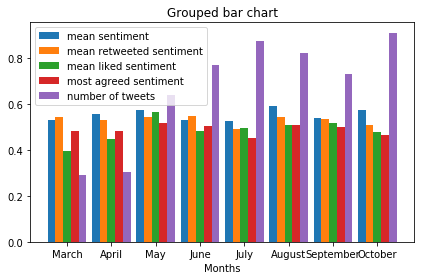

In [180]:
#grouped bar chart
avg_noT=[]
mean=round(sum(noT[:14])/len(noT[0:14]),5)
avg_noT.append(mean)
mean=round(sum(noT[14:44])/len(noT[14:44]),5)
avg_noT.append(mean)
mean=round(sum(noT[44:75])/len(noT[44:75]),5)
avg_noT.append(mean)
mean=round(sum(noT[75:105])/len(noT[75:105]),5)
avg_noT.append(mean)
mean=round(sum(noT[105:136])/len(noT[105:136]),5)
avg_noT.append(mean)
mean=round(sum(noT[136:167])/len(noT[136:167]),5)
avg_noT.append(mean)
mean=round(sum(noT[167:197])/len(noT[167:197]),5)
avg_noT.append(mean)
mean=round(sum(noT[197:])/len(noT[197:]),5)
avg_noT.append(mean)

avg_mas=[]
mean=round(sum(mas[:14])/len(mas[0:14]),5)
avg_mas.append(mean)
mean=round(sum(mas[14:44])/len(mas[14:44]),5)
avg_mas.append(mean)
mean=round(sum(mas[44:75])/len(mas[44:75]),5)
avg_mas.append(mean)
mean=round(sum(mas[75:105])/len(mas[75:105]),5)
avg_mas.append(mean)
mean=round(sum(mas[105:136])/len(mas[105:136]),5)
avg_mas.append(mean)
mean=round(sum(mas[136:167])/len(mas[136:167]),5)
avg_mas.append(mean)
mean=round(sum(mas[167:197])/len(mas[167:197]),5)
avg_mas.append(mean)
mean=round(sum(mas[197:])/len(mas[197:]),5)
avg_mas.append(mean)


avg_mls=[]
mean=round(sum(mls[:14])/len(mls[0:14]),5)
avg_mls.append(mean)
mean=round(sum(mls[14:44])/len(mls[14:44]),5)
avg_mls.append(mean)
mean=round(sum(mls[44:75])/len(mls[44:75]),5)
avg_mls.append(mean)
mean=round(sum(mls[75:105])/len(mls[75:105]),5)
avg_mls.append(mean)
mean=round(sum(mls[105:136])/len(mls[105:136]),5)
avg_mls.append(mean)
mean=round(sum(mls[136:167])/len(mls[136:167]),5)
avg_mls.append(mean)
mean=round(sum(mls[167:197])/len(mls[167:197]),5)
avg_mls.append(mean)
mean=round(sum(mls[197:])/len(mls[197:]),5)
avg_mls.append(mean)


avg_mrs=[]
mean=round(sum(mrs[:14])/len(mrs[0:14]),5)
avg_mrs.append(mean)
mean=round(sum(mrs[14:44])/len(mrs[14:44]),5)
avg_mrs.append(mean)
mean=round(sum(mrs[44:75])/len(mrs[44:75]),5)
avg_mrs.append(mean)
mean=round(sum(mrs[75:105])/len(mrs[75:105]),5)
avg_mrs.append(mean)
mean=round(sum(mrs[105:136])/len(mrs[105:136]),5)
avg_mrs.append(mean)
mean=round(sum(mrs[136:167])/len(mrs[136:167]),5)
avg_mrs.append(mean)
mean=round(sum(mrs[167:197])/len(mrs[167:197]),5)
avg_mrs.append(mean)
mean=round(sum(mrs[197:])/len(mrs[197:]),5)
avg_mrs.append(mean)


avg_ms=[]
mean=round(sum(ms[:14])/len(ms[0:14]),5)
avg_ms.append(mean)
mean=round(sum(ms[14:44])/len(ms[14:44]),5)
avg_ms.append(mean)
mean=round(sum(ms[44:75])/len(ms[44:75]),5)
avg_ms.append(mean)
mean=round(sum(ms[75:105])/len(ms[75:105]),5)
avg_ms.append(mean)
mean=round(sum(ms[105:136])/len(ms[105:136]),5)
avg_ms.append(mean)
mean=round(sum(ms[136:167])/len(ms[136:167]),5)
avg_ms.append(mean)
mean=round(sum(ms[167:197])/len(ms[167:197]),5)
avg_ms.append(mean)
mean=round(sum(ms[197:])/len(ms[197:]),5)
avg_ms.append(mean)

rects1 = plt.bar(ind - 2*width, avg_ms, width=width, label='mean sentiment')
rects2 = plt.bar(ind - width, avg_mrs, width=width, label='mean retweeted sentiment')
rects3 = plt.bar(ind , avg_mls, width=width, label='mean liked sentiment')
rects4 = plt.bar(ind + width, avg_mas, width=width, label='most agreed sentiment')
rects5 = plt.bar(ind + 2*width, avg_noT, width=width, label='number of tweets')
plt.legend()
plt.xlabel('Months')
plt.title('Grouped bar chart')
plt.xticks(ticks=ind,labels=months)
plt.tight_layout()
plt.show()

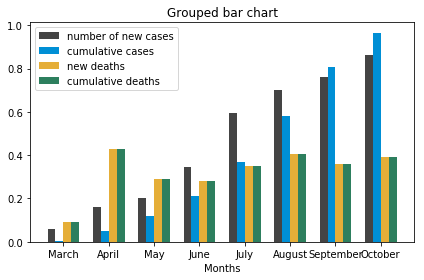

In [181]:
#grouped bar chart
avg_cd=[]
mean=round(sum(cd[:14])/len(cd[0:14]),5)
avg_cd.append(mean)
mean=round(sum(cd[14:44])/len(cd[14:44]),5)
avg_cd.append(mean)
mean=round(sum(cd[44:75])/len(cd[44:75]),5)
avg_cd.append(mean)
mean=round(sum(cd[75:105])/len(cd[75:105]),5)
avg_cd.append(mean)
mean=round(sum(cd[105:136])/len(cd[105:136]),5)
avg_cd.append(mean)
mean=round(sum(cd[136:167])/len(cd[136:167]),5)
avg_cd.append(mean)
mean=round(sum(cd[167:197])/len(cd[167:197]),5)
avg_cd.append(mean)
mean=round(sum(cd[197:])/len(cd[197:]),5)
avg_cd.append(mean)


avg_cc=[]
mean=round(sum(cc[:14])/len(cc[0:14]),5)
avg_cc.append(mean)
mean=round(sum(cc[14:44])/len(cc[14:44]),5)
avg_cc.append(mean)
mean=round(sum(cc[44:75])/len(cc[44:75]),5)
avg_cc.append(mean)
mean=round(sum(cc[75:105])/len(cc[75:105]),5)
avg_cc.append(mean)
mean=round(sum(cc[105:136])/len(cc[105:136]),5)
avg_cc.append(mean)
mean=round(sum(cc[136:167])/len(cc[136:167]),5)
avg_cc.append(mean)
mean=round(sum(cc[167:197])/len(cc[167:197]),5)
avg_cc.append(mean)
mean=round(sum(cc[197:])/len(cc[197:]),5)
avg_cc.append(mean)


avg_nd=[]
mean=round(sum(nd[:14])/len(nd[0:14]),5)
avg_nd.append(mean)
mean=round(sum(nd[14:44])/len(nd[14:44]),5)
avg_nd.append(mean)
mean=round(sum(nd[44:75])/len(nd[44:75]),5)
avg_nd.append(mean)
mean=round(sum(nd[75:105])/len(nd[75:105]),5)
avg_nd.append(mean)
mean=round(sum(nd[105:136])/len(nd[105:136]),5)
avg_nd.append(mean)
mean=round(sum(nd[136:167])/len(nd[136:167]),5)
avg_nd.append(mean)
mean=round(sum(nd[167:197])/len(nd[167:197]),5)
avg_nd.append(mean)
mean=round(sum(nd[197:])/len(nd[197:]),5)
avg_nd.append(mean)


avg_nc=[]
mean=round(sum(nc[:14])/len(nc[0:14]),5)
avg_nc.append(mean)
mean=round(sum(nc[14:44])/len(nc[14:44]),5)
avg_nc.append(mean)
mean=round(sum(nc[44:75])/len(nc[44:75]),5)
avg_nc.append(mean)
mean=round(sum(nc[75:105])/len(nc[75:105]),5)
avg_nc.append(mean)
mean=round(sum(nc[105:136])/len(nc[105:136]),5)
avg_nc.append(mean)
mean=round(sum(nc[136:167])/len(nc[136:167]),5)
avg_nc.append(mean)
mean=round(sum(nc[167:197])/len(nc[167:197]),5)
avg_nc.append(mean)
mean=round(sum(nc[197:])/len(nc[197:]),5)
avg_nc.append(mean)

rects1 = plt.bar(ind - 3*width/2, avg_nc, width=width, color="#444444", label='number of new cases')
rects2 = plt.bar(ind - width/2, avg_cc, width=width, color="#008fd5", label='cumulative cases')
rects3 = plt.bar(ind + width/2, avg_nd, width=width, color="#e5ae38", label='new deaths')
rects4 = plt.bar(ind + 3*width/2, avg_nd, width=width, color="#2d7f5e", label='cumulative deaths')

plt.xlabel('Months')
plt.title('Grouped bar chart')
plt.xticks(ticks=ind,labels=months)
plt.tight_layout()
plt.legend()
plt.show()


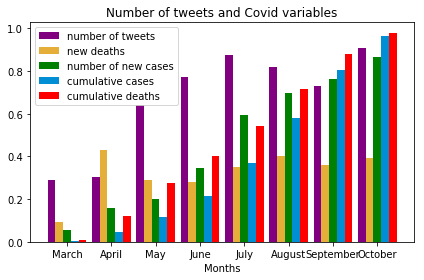

In [235]:
rects1 = plt.bar(ind - 2*width, avg_noT, width=width, color="purple",label='number of tweets')
rects2 = plt.bar(ind - width, avg_nd, width=width, color="#e5ae38", label='new deaths')
rects3 = plt.bar(ind , avg_nc, width=width,  color="green", label='number of new cases')
rects4 = plt.bar(ind + width, avg_cc, width=width, color="#008fd5", label='cumulative cases')
rects5 = plt.bar(ind + 2*width, avg_cd, width=width, color="red", label='cumulative deaths')

plt.xlabel('Months')
plt.title('Number of tweets and Covid variables')
plt.xticks(ticks=ind,labels=months)
plt.tight_layout()
plt.legend()
plt.savefig('Number of tweets vs Covid variables.png',dpi=300,bbox_inches='tight')
plt.show()

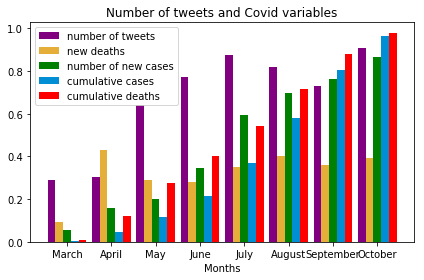

In [236]:
rects1 = plt.bar(ind - 2*width, avg_noT, width=width, color="purple",label='number of tweets')
rects2 = plt.bar(ind - width, avg_nd, width=width, color="#e5ae38", label='new deaths')
rects3 = plt.bar(ind , avg_nc, width=width,  color="green", label='number of new cases')
rects4 = plt.bar(ind + width, avg_cc, width=width, color="#008fd5", label='cumulative cases')
rects5 = plt.bar(ind + 2*width, avg_cd, width=width, color="red", label='cumulative deaths')

plt.xlabel('Months')
plt.title('Number of tweets and Covid variables')
plt.xticks(ticks=ind,labels=months)
plt.tight_layout()
plt.legend()
plt.savefig('Number of tweets vs Covid variables.png',dpi=300,bbox_inches='tight')
plt.show()

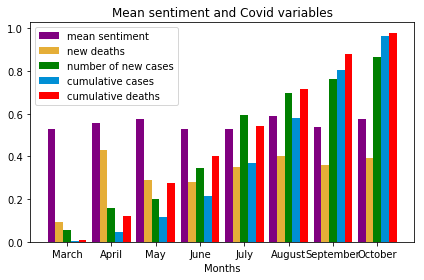

In [237]:
rects1 = plt.bar(ind - 2*width, avg_ms, width=width, color="purple",label='mean sentiment')
rects2 = plt.bar(ind - width, avg_nd, width=width, color="#e5ae38", label='new deaths')
rects3 = plt.bar(ind , avg_nc, width=width,  color="green", label='number of new cases')
rects4 = plt.bar(ind + width, avg_cc, width=width, color="#008fd5", label='cumulative cases')
rects5 = plt.bar(ind + 2*width, avg_cd, width=width, color="red", label='cumulative deaths')

plt.xlabel('Months')
plt.title('Mean sentiment and Covid variables')
plt.xticks(ticks=ind,labels=months)
plt.tight_layout()
plt.legend()
plt.savefig('Mean sentiment vs Covid variables.png',dpi=300,bbox_inches='tight')
plt.show()

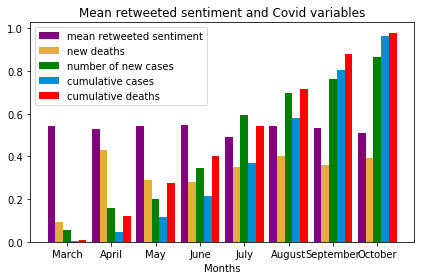

In [238]:
rects1 = plt.bar(ind - 2*width, avg_mrs, width=width, color="purple",label='mean retweeted sentiment')
rects2 = plt.bar(ind - width, avg_nd, width=width, color="#e5ae38", label='new deaths')
rects3 = plt.bar(ind , avg_nc, width=width,  color="green", label='number of new cases')
rects4 = plt.bar(ind + width, avg_cc, width=width, color="#008fd5", label='cumulative cases')
rects5 = plt.bar(ind + 2*width, avg_cd, width=width, color="red", label='cumulative deaths')

plt.xlabel('Months')
plt.title('Mean retweeted sentiment and Covid variables')
plt.xticks(ticks=ind,labels=months)
plt.tight_layout()
plt.legend()
plt.savefig('Mean retweeted sentiment vs Covid variables.png',dpi=300,bbox_inches='tight')
plt.show()

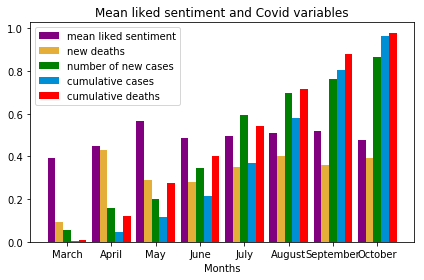

In [239]:
rects1 = plt.bar(ind - 2*width, avg_mls, width=width, color="purple",label='mean liked sentiment')
rects2 = plt.bar(ind - width, avg_nd, width=width, color="#e5ae38", label='new deaths')
rects3 = plt.bar(ind , avg_nc, width=width,  color="green", label='number of new cases')
rects4 = plt.bar(ind + width, avg_cc, width=width, color="#008fd5", label='cumulative cases')
rects5 = plt.bar(ind + 2*width, avg_cd, width=width, color="red", label='cumulative deaths')

plt.xlabel('Months')
plt.title('Mean liked sentiment and Covid variables')
plt.xticks(ticks=ind,labels=months)
plt.tight_layout()
plt.legend()
plt.savefig('Mean liked sentiment vs Covid variables.png',dpi=300,bbox_inches='tight')
plt.show()

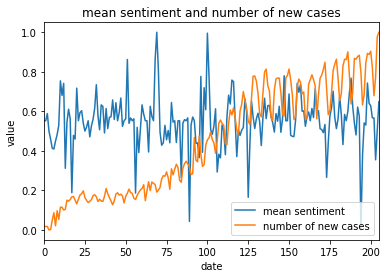

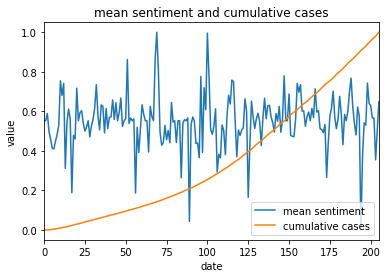

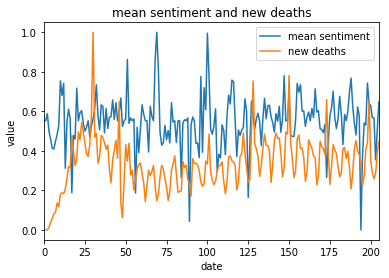

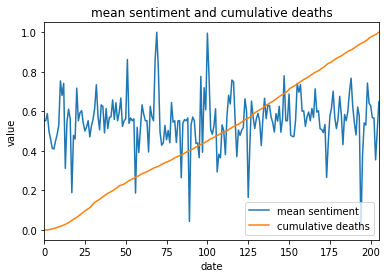

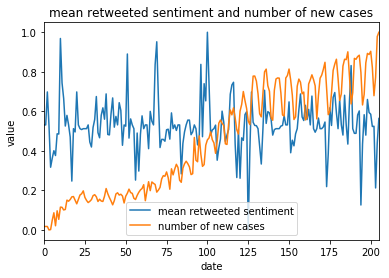

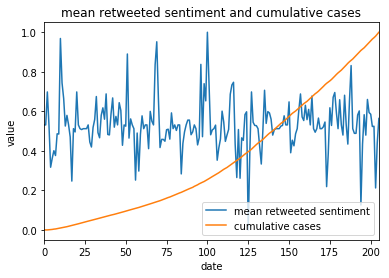

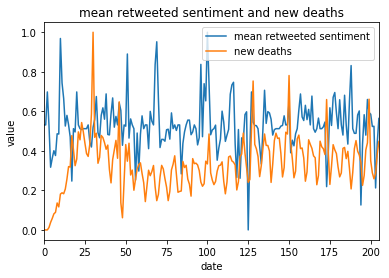

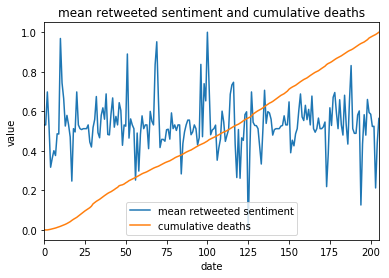

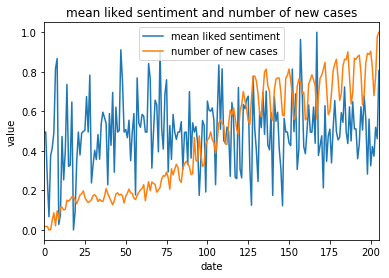

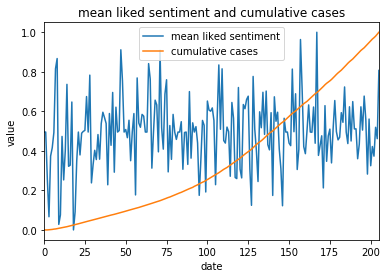

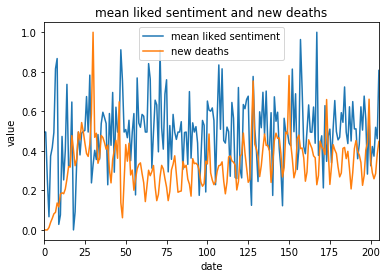

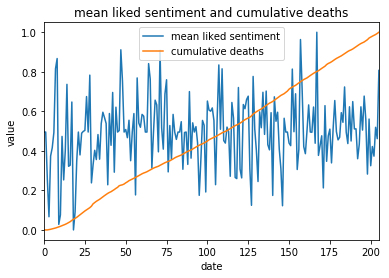

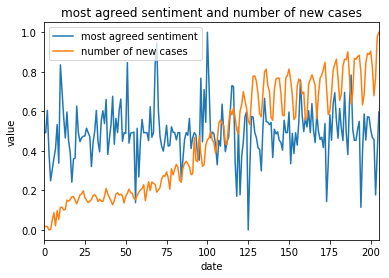

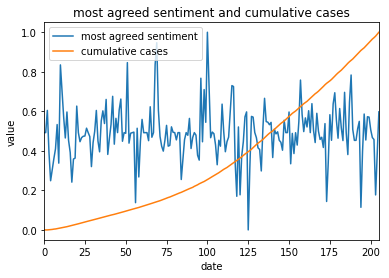

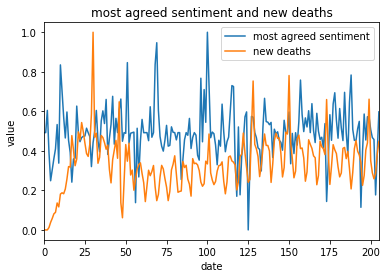

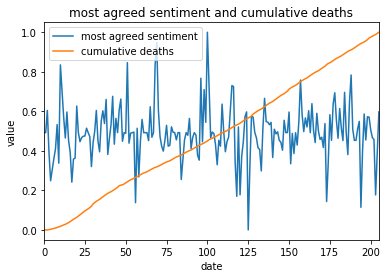

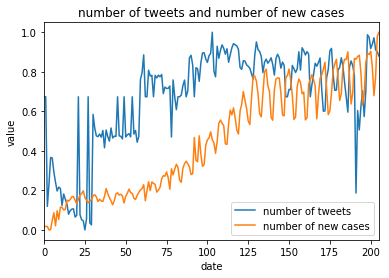

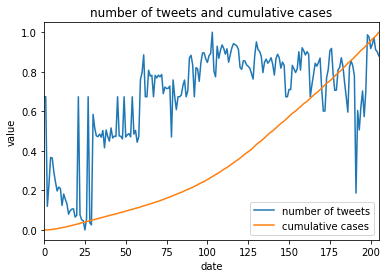

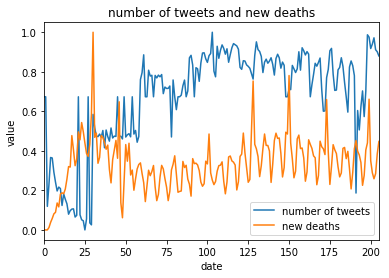

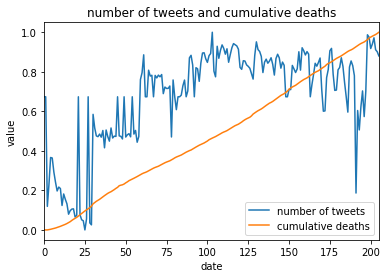

In [182]:
#line graph
# x-axis specifies the date where 0 is 20-3-2020 and 206 is 9-10-2020
# they were shown as numbers in order to make the graph more readable
tweets=[ms,mrs,mls,mas,noT]
covid=[nc,cc,nd,cd]

ly=['mean sentiment','mean retweeted sentiment','mean liked sentiment','most agreed sentiment','number of tweets']
lx=['number of new cases','cumulative cases','new deaths','cumulative deaths']
for i in range(0,5):
    for j in range(0,4):
        dataset=list(zip(tweets[i],covid[j]))
        df1=pd.DataFrame(data=dataset)
        df1.plot()
        plt.xlabel('date')
        plt.ylabel('value')
        plt.title(ly[i]+' and '+lx[j])
        plt.legend([ly[i],lx[j]])

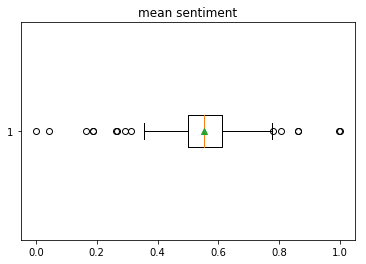

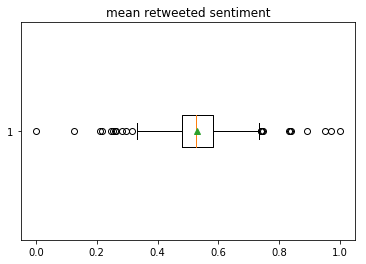

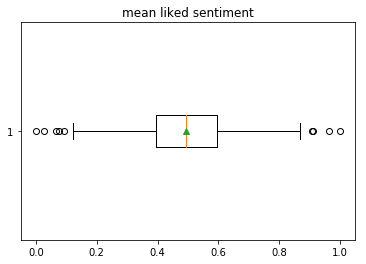

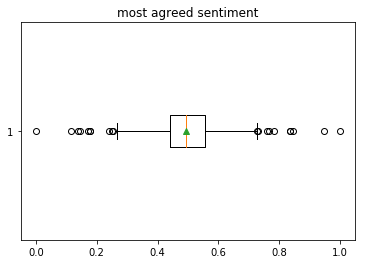

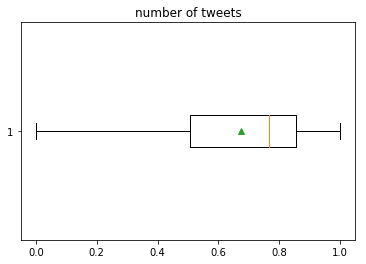

In [186]:
#box plot
for i in range(len(tweets)):
    plt.boxplot(tweets[i],showmeans=True, vert=False)
    plt.title(ly[i])
    plt.show()

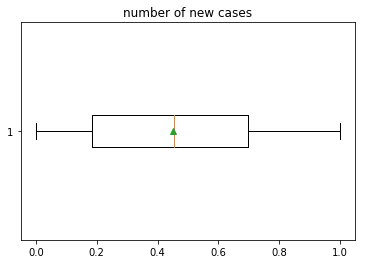

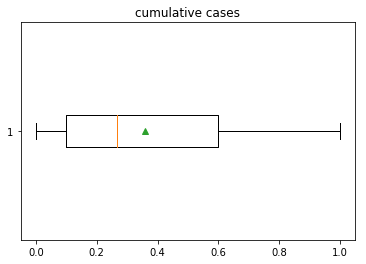

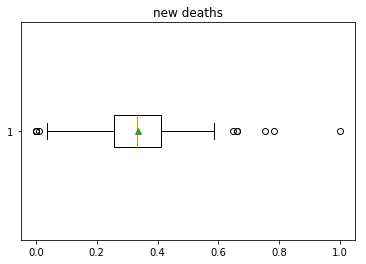

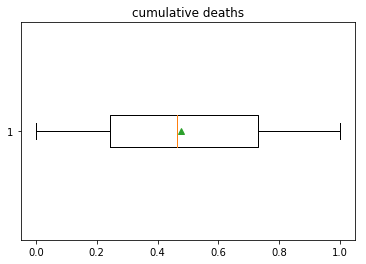

In [187]:
#box plot
for i in range(len(covid)):
    plt.boxplot(covid[i],showmeans=True, vert=False)
    plt.title(lx[i])
    plt.show()

## Standardization

Data standardization is about making sure that data is internally consistent; that is, each data type has the same content and format. Standardized values are useful for tracking data that isn't easy to compare otherwise
Standardization is the process that transforms data to have a mean of zero and a standard deviation of 1. This standardization is called a z-score, and data points can be standardized with the following formula:
zi=(xi-x_bar)/s

In [118]:
#standardization using z-score
def z_score(df):
    df_std = df.copy()
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std    

x=x2.loc[:, x2.columns != 'Date']
df_tweets_standardized = z_score(x)

round(df_tweets_standardized,10)

,Mean Sentiment,Most Retweeted Sentiment,Most Liked Sentiment,Most Agreed With Sentiment,Number Of tweets,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,0.000000,0.000000,0.000000,-0.000000,0.000000,-1.595216,-1.196463,-2.515270,-1.631108
1,0.000000,0.000000,0.000000,-0.000000,0.000000,-1.595216,-1.196463,-2.515270,-1.631108
2,0.278487,1.303964,-1.359005,0.836583,-2.210141,-1.595216,-1.196463,-2.515270,-1.631108
3,-0.407991,-0.008582,-2.433123,-0.746442,-1.760764,-1.659185,-1.194228,-2.424236,-1.626131
4,-0.714982,-1.673907,-0.689494,-1.812433,-1.224167,-1.652733,-1.191939,-2.229262,-1.620218
5,-1.067950,-1.318015,-0.451691,-1.399416,-1.234787,-1.478289,-1.188175,-2.079805,-1.613589
6,-1.098162,-1.020228,-0.011132,-0.980533,-1.519937,-1.340040,-1.183244,-1.906570,-1.606128
7,-0.792264,-1.210884,1.817769,-0.608242,-1.722386,-1.581930,-1.180357,-1.847466,-1.598384
8,-0.535516,-0.352023,2.111823,0.303577,-1.899515,-1.303189,-1.175115,-1.492844,-1.588938
9,-0.174728,-0.360497,-2.652783,-1.150145,-1.820725,-1.462784,-1.171220,-1.641622,-1.580206


In [119]:
 round(df_tweets_standardized.mean(), 10)

Mean Sentiment                0.0
Most Retweeted Sentiment      0.0
Most Liked Sentiment         -0.0
Most Agreed With Sentiment   -0.0
Number Of tweets             -0.0
 New_cases                   -0.0
 Cumulative_cases             0.0
 New_deaths                   0.0
 Cumulative_deaths           -0.0
dtype: float64

In [120]:
df_tweets_standardized.var()

Mean Sentiment                1.0
Most Retweeted Sentiment      1.0
Most Liked Sentiment          1.0
Most Agreed With Sentiment    1.0
Number Of tweets              1.0
 New_cases                    1.0
 Cumulative_cases             1.0
 New_deaths                   1.0
 Cumulative_deaths            1.0
dtype: float64

## Normalisation

Normalization is a technique often applied as part of data preparation. The goal of normalization is to change the values
of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. Every
dataset does not require normalization. It is required only when features have different ranges. In simpler
terms, normalization makes sure that all of your data looks and reads the same way across all records.

Data normalization eliminates a number of anomalies that can complicate data analysis. Some of these anomalies can
arise from deleting data, entering additional information, or updating existing information. Once these errors have been
identified and removed from the system, other benefits can be gained from other uses of the data and data analysis . By
engaging in this process, you’ll find it easier to change and update data within your database. Since the redundancies and
errors are absent, the data is much cleaner and you won’t have to mess around with it as you modify information.

**How it affects the data set?**

There are two primary advantages of having a highly normalized data schema:
1. Increased consistency. Information is stored in one place and one place only, reducing the possibility of
inconsistent data.
2. Easier object-to-data mapping. Highly-normalized data schemas in general are closer conceptually to object-
oriented schemas because the object-oriented goals of promoting high cohesion and loose coupling between
classes results in similar solutions (at least from a data point of view)

In [243]:
#using min-max method to make all values of all columns to lie in the same range (0,1)
from sklearn import preprocessing
d=x2
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(d.loc[:, d.columns != 'Date'])
dn = pd.DataFrame(x_scaled)
dn_new = dn.rename(columns={0: 'Mean Sentiment',1: 'Most Retweeted Sentiment',2: 'Most Liked Sentiment',3: 'Most Agreed With Sentiment',4: 'Number Of tweets',5: ' New_cases',6: ' Cumulative_cases',7: ' New_deaths',8: ' Cumulative_deaths'},index=dict(list(map(lambda x:(x,date[x]),range(len(date))))))
dn_new

C:\Users\varna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Mean Sentiment,Most Retweeted Sentiment,Most Liked Sentiment,Most Agreed With Sentiment,Number Of tweets,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
20-03-2020,0.552287,0.531212,0.495095,0.492239,0.673534,0.017384,0.000000,0.000000,0.000000
20-03-2020,0.552287,0.531212,0.495095,0.492239,0.673534,0.017384,0.000000,0.000000,0.000000
20-03-2020,0.588576,0.698026,0.255785,0.604617,0.119074,0.017384,0.000000,0.000000,0.000000
21-03-2020,0.499124,0.530114,0.066642,0.391971,0.231810,0.000000,0.000669,0.012137,0.001461
22-03-2020,0.459122,0.317073,0.373680,0.248777,0.366426,0.001753,0.001355,0.038131,0.003196
23-03-2020,0.413128,0.362602,0.415555,0.304257,0.363762,0.049160,0.002482,0.058056,0.005141
24-03-2020,0.409192,0.400697,0.493134,0.360525,0.292226,0.086731,0.003959,0.081152,0.007331
25-03-2020,0.449051,0.376307,0.815189,0.410535,0.241438,0.020995,0.004824,0.089032,0.009603
26-03-2020,0.482507,0.486179,0.866969,0.533019,0.197001,0.096746,0.006394,0.136310,0.012375
27-03-2020,0.529519,0.485095,0.027961,0.337742,0.216767,0.053374,0.007560,0.116475,0.014938


In [244]:
ms=dn[0]
mrs=dn[1]
mls=dn[2]
mas=dn[3]
noT=dn[4]
nc=dn[5]
cc=dn[6]
nd=dn[7]
cd=dn[8]

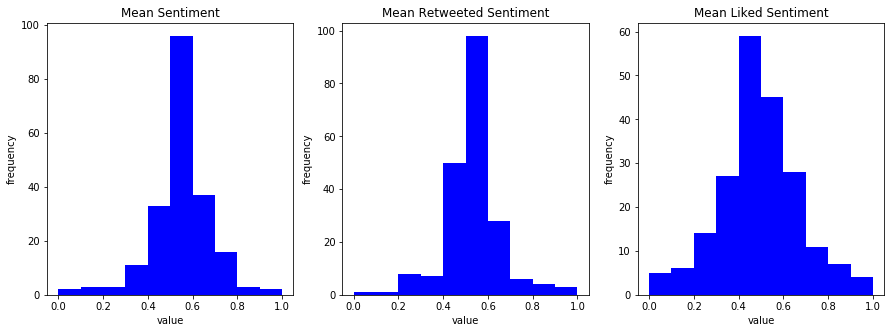

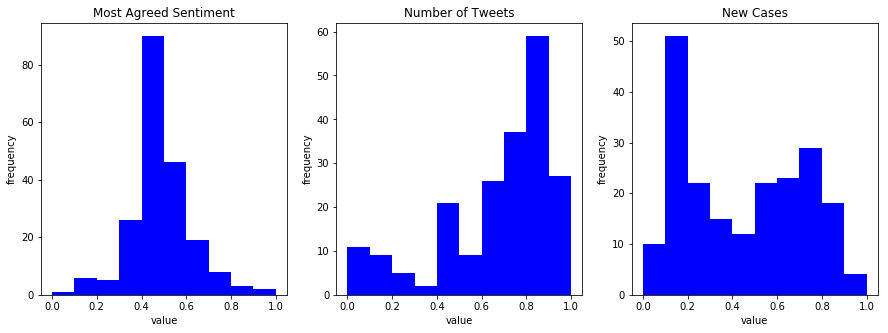

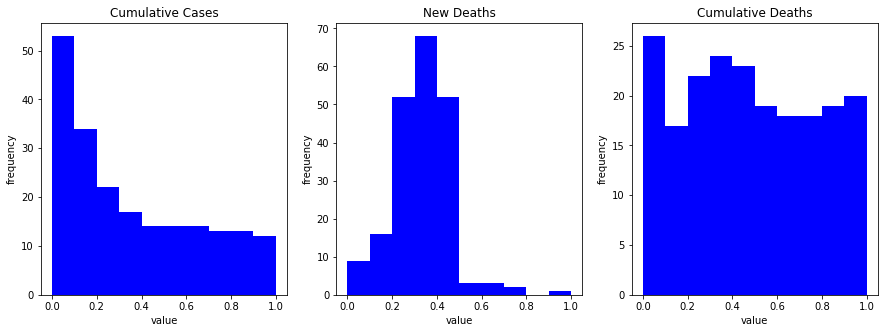

In [104]:
%matplotlib inline

def axi(name,i):
    ax[i].set_title(name)
    ax[i].set_xlabel('value')
    ax[i].set_ylabel('frequency')

bins = 10
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5, forward=True)
axi('Mean Sentiment',0)
ax[0].hist(ms, bins, alpha = 1, color = 'b')
axi('Mean Retweeted Sentiment',1)
ax[1].hist(mrs, bins, alpha = 1, color = 'b')
axi('Mean Liked Sentiment',2)
ax[2].hist(mls, bins, alpha = 1, color = 'b')
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5, forward=True)
axi('Most Agreed Sentiment',0)
ax[0].hist(mas, bins, alpha = 1, color = 'b')
axi('Number of Tweets',1)
ax[1].hist(noT, bins, alpha = 1, color = 'b')
axi('New Cases',2)
ax[2].hist(nc, bins, alpha = 1, color = 'b')
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5, forward=True)
axi('Cumulative Cases',0)
ax[0].hist(cc, bins, alpha = 1, color = 'b')
axi('New Deaths',1)
ax[1].hist(nd, bins, alpha = 1, color = 'b')
axi('Cumulative Deaths',2)
ax[2].hist(cd, bins, alpha = 1, color = 'b')
plt.show()

In [264]:
#removing outliers
from scipy import stats
dn_new=dn_new[(np.abs(stats.zscore(dn_new)) < 3).all(axis=1)]
len(dn_new)

197

# Hypothesis Testing

Our hypothesis:
Taking the number of covid deaths as a measure of global negativity (as it is a cause for global negativity), 
higher number of deaths due to covid, greater is the global negativity, the mean sentiment of the tweets are always positive and is higher than the the amount of negativity (number of covid related deaths).

In [265]:
alpha  = 0.05
sample_mean_x =  dn_new['Mean Sentiment'].mean()
sample_mean_y = dn_new[' New_deaths'].mean()
sample_size_x = len(dn_new)
sample_size_y = len(dn_new)
std_dev_x = dn[0].var()**0.5
std_dev_y = dn[5].var()**0.5

In [270]:
std_dev_y

0.2717611030367395

In [267]:
from scipy.stats import norm
from math import sqrt
def one_sided_mean_hypo(sample_mean_x,sample_mean_y,std_dev_x,std_dev_y,sample_size_x,sample_size_y,alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = ((sample_mean_x - sample_mean_y)/sqrt(((std_dev_x*std_dev_x)/(sample_size_x))+((std_dev_y*std_dev_y)/(sample_size_y))))
    print('actual_z:',actual_z)
    print('hypo_z:',hypo_z)
    if(hypo_z >= actual_z):
        return True
    else:
        return False
    

**NULL HYPOTHESIS (H O )** – The difference between means of the mean sentiment and mean number of deaths is lesser than or equal to 0<br>
**ALTERNATIVE HYPOTHESIS (H 1 )** – The difference between means of the mean sentiment and mean number of deaths is always positive<br>
**SIGNIFICANCE LEVEL (ALPHA)** – The significance level is 0.05<br>

In [268]:
print("H0 : μx - μy <= 0")
print('H1 : μx - μy > 0')
print("alpha value is :", alpha,'\n')

rej = one_sided_mean_hypo(sample_mean_x,sample_mean_y,std_dev_x,std_dev_y,sample_size_x,sample_size_y,alpha)
if rej:
    print("Reject NULL Hypothesis")
else:
    print("Failed to reject NULL hypothesis")

H0 : μx - μy <= 0
H1 : μx - μy > 0
alpha value is : 0.05 

actual_z: 1.6448536269514729
hypo_z: 10.384343599484845
Reject NULL Hypothesis


**CONCLUSION** – 
From this we can conclude that mean of sentiment of tweets was always greater than mean number of deaths, from this we can infer that people stayed positive and tried spreading positivety on social media even when times were tough

# Correlation

Values close to -1 and 1 show negative and positive correlation respectively. Values 0 and close to 0 signifies no correlation between the variables

In [249]:
corr=dn_new.corr() #pearson method
corr

,Mean Sentiment,Most Retweeted Sentiment,Most Liked Sentiment,Most Agreed With Sentiment,Number Of tweets,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Mean Sentiment,1.000000,0.824094,-0.024143,0.781976,0.079393,0.062221,0.036610,0.105044,0.040141
Most Retweeted Sentiment,0.824094,1.000000,-0.016173,0.952874,0.025519,0.007413,-0.017873,0.041651,-0.015368
Most Liked Sentiment,-0.024143,-0.016173,1.000000,0.287915,0.156354,0.083468,0.080882,0.000710,0.110407
Most Agreed With Sentiment,0.781976,0.952874,0.287915,1.000000,0.071880,0.032425,0.007422,0.040108,0.018779
Number Of tweets,0.079393,0.025519,0.156354,0.071880,1.000000,0.608575,0.542322,0.047868,0.666206
New_cases,0.062221,0.007413,0.083468,0.032425,0.608575,1.000000,0.926499,0.393428,0.946259
Cumulative_cases,0.036610,-0.017873,0.080882,0.007422,0.542322,0.926499,1.000000,0.249454,0.977803
New_deaths,0.105044,0.041651,0.000710,0.040108,0.047868,0.393428,0.249454,1.000000,0.260544
Cumulative_deaths,0.040141,-0.015368,0.110407,0.018779,0.666206,0.946259,0.977803,0.260544,1.000000


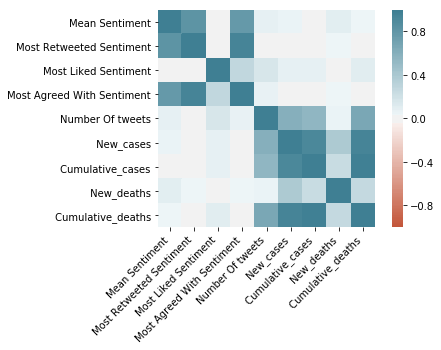

In [250]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [251]:
#positive correlation
corr[corr>0].stack().drop_duplicates().round(3).to_dict()

{('Mean Sentiment', 'Mean Sentiment'): 1.0,
 ('Mean Sentiment', 'Most Retweeted Sentiment'): 0.824,
 ('Mean Sentiment', 'Most Agreed With Sentiment'): 0.782,
 ('Mean Sentiment', 'Number Of tweets'): 0.079,
 ('Mean Sentiment', ' New_cases'): 0.062,
 ('Mean Sentiment', ' Cumulative_cases'): 0.037,
 ('Mean Sentiment', ' New_deaths'): 0.105,
 ('Mean Sentiment', ' Cumulative_deaths'): 0.04,
 ('Most Retweeted Sentiment', 'Most Agreed With Sentiment'): 0.953,
 ('Most Retweeted Sentiment', 'Number Of tweets'): 0.026,
 ('Most Retweeted Sentiment', ' New_cases'): 0.007,
 ('Most Retweeted Sentiment', ' New_deaths'): 0.042,
 ('Most Liked Sentiment', 'Most Agreed With Sentiment'): 0.288,
 ('Most Liked Sentiment', 'Number Of tweets'): 0.156,
 ('Most Liked Sentiment', ' New_cases'): 0.083,
 ('Most Liked Sentiment', ' Cumulative_cases'): 0.081,
 ('Most Liked Sentiment', ' New_deaths'): 0.001,
 ('Most Liked Sentiment', ' Cumulative_deaths'): 0.11,
 ('Most Agreed With Sentiment', 'Number Of tweets'): 0.

In [252]:
# negative correlation
corr[corr<0].stack().drop_duplicates().round(3).to_dict()

{('Mean Sentiment', 'Most Liked Sentiment'): -0.024,
 ('Most Retweeted Sentiment', 'Most Liked Sentiment'): -0.016,
 ('Most Retweeted Sentiment', ' Cumulative_cases'): -0.018,
 ('Most Retweeted Sentiment', ' Cumulative_deaths'): -0.015}

## extra finding

In [253]:
#for the months of june, july, august
dn_new[75:167].corr()

,Mean Sentiment,Most Retweeted Sentiment,Most Liked Sentiment,Most Agreed With Sentiment,Number Of tweets,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Mean Sentiment,1.000000,0.758608,-0.056353,0.700077,0.038257,0.282507,0.242503,0.362018,0.244495
Most Retweeted Sentiment,0.758608,1.000000,0.041435,0.956596,0.055391,0.113579,0.050243,0.246568,0.052055
Most Liked Sentiment,-0.056353,0.041435,1.000000,0.330803,0.113801,0.095957,0.074477,0.096056,0.075360
Most Agreed With Sentiment,0.700077,0.956596,0.330803,1.000000,0.085510,0.135264,0.069178,0.260903,0.071146
Number Of tweets,0.038257,0.055391,0.113801,0.085510,1.000000,0.259826,0.205423,-0.052465,0.241395
New_cases,0.282507,0.113579,0.095957,0.135264,0.259826,1.000000,0.845520,0.726593,0.860014
Cumulative_cases,0.242503,0.050243,0.074477,0.069178,0.205423,0.845520,1.000000,0.485559,0.998456
New_deaths,0.362018,0.246568,0.096056,0.260903,-0.052465,0.726593,0.485559,1.000000,0.493477
Cumulative_deaths,0.244495,0.052055,0.075360,0.071146,0.241395,0.860014,0.998456,0.493477,1.000000


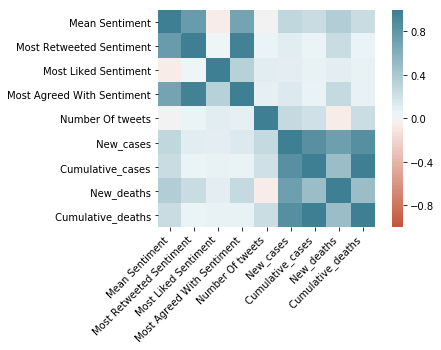

In [254]:
#for the months of june, july, august
ax = sns.heatmap(
    dn_new[75:167].corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [255]:
#positive correlation
corr=dn_new[75:167].corr()
corr[corr>0].stack().drop_duplicates().round(3).to_dict()

{('Mean Sentiment', 'Mean Sentiment'): 1.0,
 ('Mean Sentiment', 'Most Retweeted Sentiment'): 0.759,
 ('Mean Sentiment', 'Most Agreed With Sentiment'): 0.7,
 ('Mean Sentiment', 'Number Of tweets'): 0.038,
 ('Mean Sentiment', ' New_cases'): 0.283,
 ('Mean Sentiment', ' Cumulative_cases'): 0.243,
 ('Mean Sentiment', ' New_deaths'): 0.362,
 ('Mean Sentiment', ' Cumulative_deaths'): 0.244,
 ('Most Retweeted Sentiment', 'Most Liked Sentiment'): 0.041,
 ('Most Retweeted Sentiment', 'Most Agreed With Sentiment'): 0.957,
 ('Most Retweeted Sentiment', 'Number Of tweets'): 0.055,
 ('Most Retweeted Sentiment', ' New_cases'): 0.114,
 ('Most Retweeted Sentiment', ' Cumulative_cases'): 0.05,
 ('Most Retweeted Sentiment', ' New_deaths'): 0.247,
 ('Most Retweeted Sentiment', ' Cumulative_deaths'): 0.052,
 ('Most Liked Sentiment', 'Most Agreed With Sentiment'): 0.331,
 ('Most Liked Sentiment', 'Number Of tweets'): 0.114,
 ('Most Liked Sentiment', ' New_cases'): 0.096,
 ('Most Liked Sentiment', ' Cumulat

In [256]:
# negative correlation
corr[corr<0].stack().drop_duplicates().round(3).to_dict()

{('Mean Sentiment', 'Most Liked Sentiment'): -0.056,
 ('Number Of tweets', ' New_deaths'): -0.052}

# Inference

From the above hypothesis testing, we can see that the mean sentiment of the tweets are always greater than number of deaths, implying that people on social media tried to spread a lot of positivity during hard times.

Interesting things we found:

It would usually be expected that the sentiment of the tweets toward corona would become more negative as number of cases and deaths due to it increases, but as found out in the above testing, social media (specifically twitter in our case) tries to boost morale during these tough times.
This same observation is also seen in this research paper: https://www.researchgate.net/publication/342733537_Detecting_Topic_and_Sentiment_Dynamics_Due_to_COVID-19_Pandemic_Using_Social_Media

It was also found that in the peak of lockdown around the world (in the months June, July and August), there seems to be a correlation between the mean sentiment and the number of covid-19 deaths to a great extent. 

It is also seen that the number of tweets increased similarly with the increase in covid cases and deaths, which was to be expected as more awareness about covid-19 spread with the spread of covid-19 virus around the world.
